# Project Description: AI Global Index Analysis

This project analyzes the AI Global Index, which benchmarks 62 countries on their AI investment, innovation, and implementation. The dataset includes seven key indicators: Talent, Infrastructure, Operating Environment, Research, and Development.

The goal is to visualize country rankings and compare AI development across regions, income groups, and political regimes. We will explore correlations between factors like AI talent, infrastructure, and research, and create predictive models for future AI trends. The final deliverables will provide insights into global AI progress and highlight leading countries in AI development.



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [4]:
df_AI = pd.read_csv("AI_index_db.csv")
df_AI.head(5)

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [5]:

print(df_AI.isnull().sum())

df_AI = df_AI.dropna()  

df_AI['Talent'] = pd.to_numeric(df_AI['Talent'], errors='coerce')
df_AI['Infrastructure'] = pd.to_numeric(df_AI['Infrastructure'], errors='coerce')
df_AI['Operating Environment'] = pd.to_numeric(df_AI['Operating Environment'], errors='coerce')
df_AI['Research'] = pd.to_numeric(df_AI['Research'], errors='coerce')
df_AI['Development'] = pd.to_numeric(df_AI['Development'], errors='coerce')
df_AI['Government Strategy'] = pd.to_numeric(df_AI['Government Strategy'], errors='coerce')
df_AI['Commercial'] = pd.to_numeric(df_AI['Commercial'], errors='coerce')
df_AI['Total score'] = pd.to_numeric(df_AI['Total score'], errors='coerce')


df_AI['Region'] = df_AI['Region'].str.strip()  
df_AI['Cluster'] = df_AI['Cluster'].str.strip()
df_AI['Income group'] = df_AI['Income group'].str.strip()
df_AI['Political regime'] = df_AI['Political regime'].str.strip()

df = df_AI.drop_duplicates()




Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64


In [6]:
df_AI.head(7)

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy
5,Singapore,39.38,84.30,43.15,37.67,22.55,79.82,15.07,38.67,Asia-Pacific,Rising stars,High,Electoral democracy
6,South Korea,14.54,85.23,68.86,26.66,77.25,87.50,5.41,38.60,Asia-Pacific,Rising stars,High,Liberal democracy


 # 1.Which 5 countries exhibit the highest aggregate performance in terms of their AI Index Total Score, and how do their respective scores compare relative to one another?

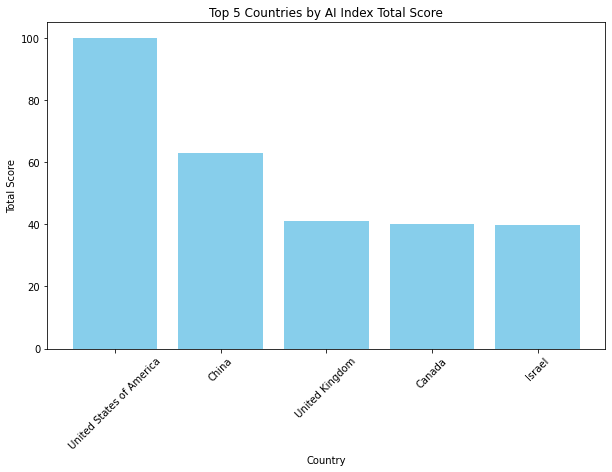

In [7]:
top_5_countries = df_AI[['Country', 'Total score']].sort_values(by='Total score', ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(top_5_countries['Country'], top_5_countries['Total score'], color='skyblue')
plt.title("Top 5 Countries by AI Index Total Score")
plt.xlabel("Country")
plt.ylabel("Total Score")
plt.xticks(rotation=45)
plt.show()


# 2.Which regions show the highest average AI index scores across countries? 

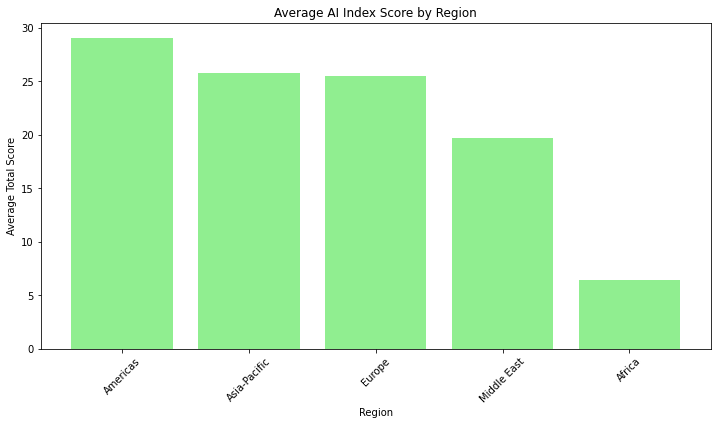

In [8]:
average_score_by_region = df_AI.groupby('Region')['Total score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(average_score_by_region.index, average_score_by_region.values, color='lightgreen')
plt.title("Average AI Index Score by Region")
plt.xlabel("Region")
plt.ylabel("Average Total Score")
plt.xticks(rotation=45)
plt.show()


# 3. identify any significant trends or patterns based on the relationship between the AI index score and factors like income group, political regime, and region?

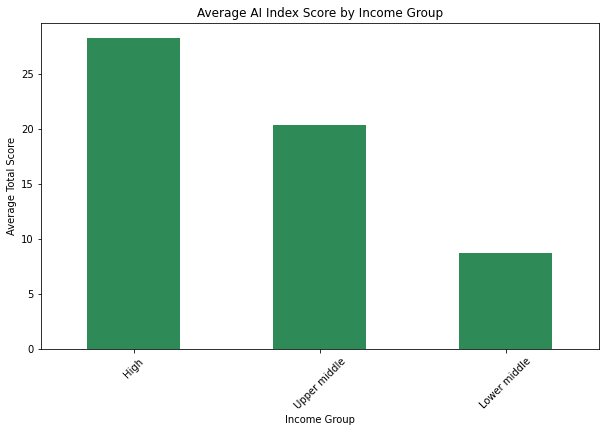

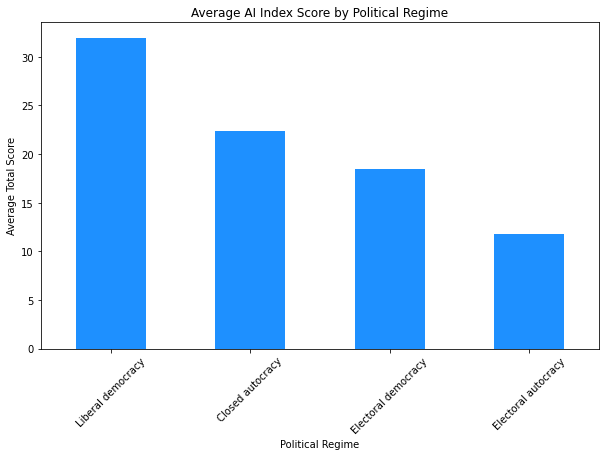

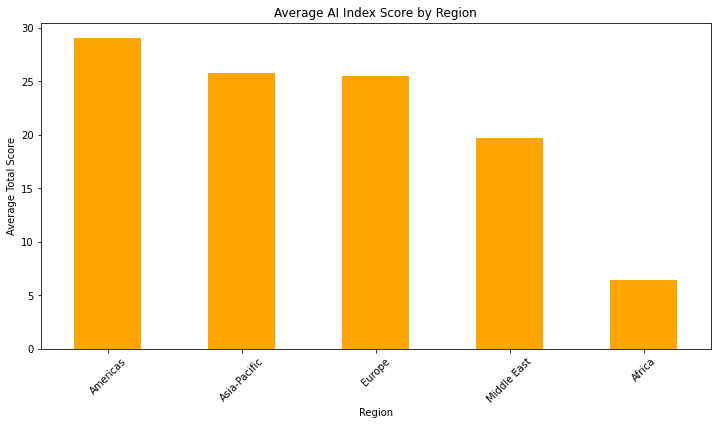

In [9]:

income_group_performance = df_AI.groupby('Income group')['Total score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
income_group_performance.plot(kind='bar', color='seagreen')
plt.title('Average AI Index Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()

political_regime_performance = df_AI.groupby('Political regime')['Total score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
political_regime_performance.plot(kind='bar', color='dodgerblue')
plt.title('Average AI Index Score by Political Regime')
plt.xlabel('Political Regime')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()

region_performance = df_AI.groupby('Region')['Total score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
region_performance.plot(kind='bar', color='orange')
plt.title('Average AI Index Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()


# 4.How do AI index scores correlate with the economic and political environment? 


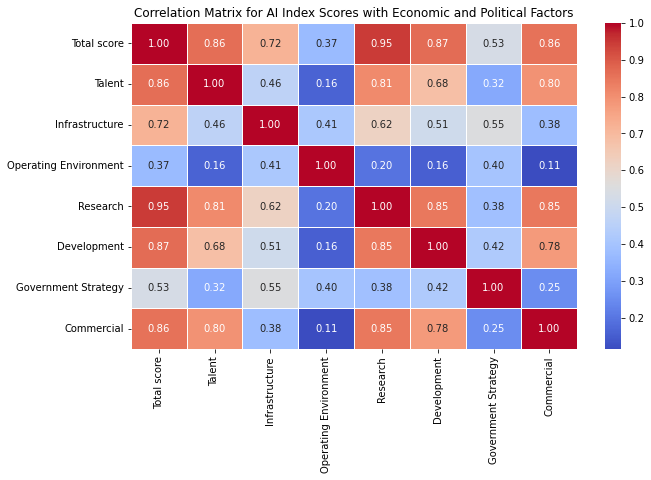

In [10]:
correlation_matrix = df_AI[['Total score', 'Talent', 'Infrastructure', 'Operating Environment', 
                            'Research', 'Development', 'Government Strategy', 'Commercial']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for AI Index Scores with Economic and Political Factors')
plt.show()

# 5.What are the key drivers behind the AI index scores across different countries? Can we identify the top attributes that contribute most to a country’s AI development, and how can this influence strategic decisions for AI investment?

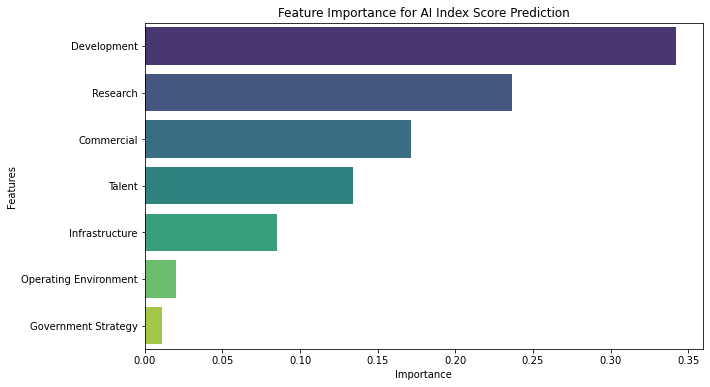

In [11]:
features = df_AI[['Talent', 'Infrastructure', 'Operating Environment', 'Research', 
                  'Development', 'Government Strategy', 'Commercial']]
target = df_AI['Total score']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

feature_importance = model.feature_importances_
feature_names = features.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for AI Index Score Prediction')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()



# 6.How does the AI development index vary by region? Are there significant differences in AI development between regions, and how can this information guide region-specific AI policy and investment strategies?

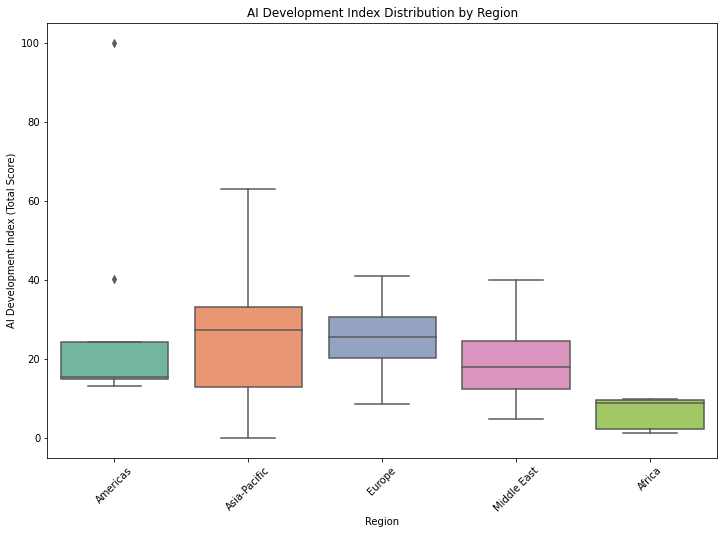

In [12]:
region_avg_score = df_AI.groupby('Region')['Total score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.boxplot(x='Region', y='Total score', data=df_AI, palette='Set2')
plt.title('AI Development Index Distribution by Region')
plt.xlabel('Region')
plt.ylabel('AI Development Index (Total Score)')
plt.xticks(rotation=45)
plt.show()


# 7.Can we identify patterns that suggest specific income groups or political regimes are more favorable for AI development?

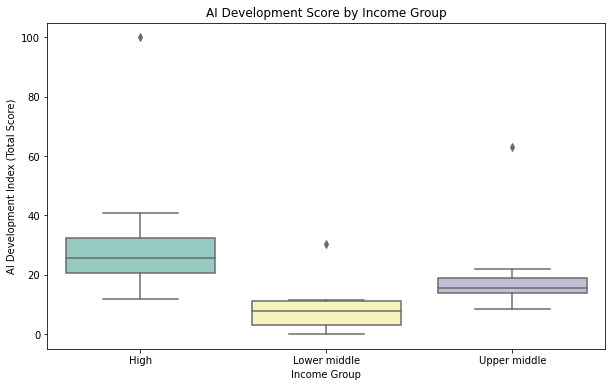

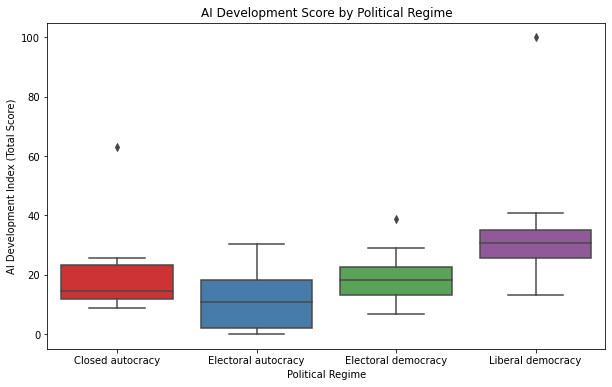

In [13]:
df_AI['Income group'] = df_AI['Income group'].astype('category')
df_AI['Political regime'] = df_AI['Political regime'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income group', y='Total score', data=df_AI, palette='Set3')
plt.title('AI Development Score by Income Group')
plt.xlabel('Income Group')
plt.ylabel('AI Development Index (Total Score)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Political regime', y='Total score', data=df_AI, palette='Set1')
plt.title('AI Development Score by Political Regime')
plt.xlabel('Political Regime')
plt.ylabel('AI Development Index (Total Score)')
plt.show()

# 8.How does AI development correlate with a country's income group and political regime? 

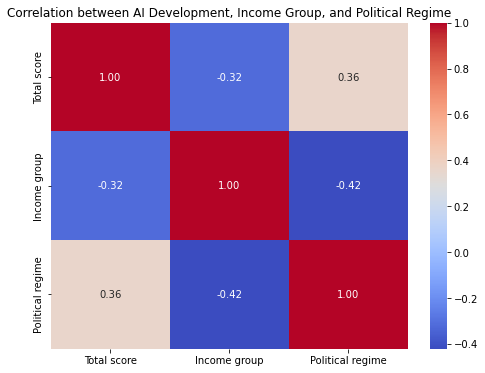

In [14]:
df_AI_encoded = df_AI.copy()
df_AI_encoded['Income group'] = df_AI_encoded['Income group'].cat.codes
df_AI_encoded['Political regime'] = df_AI_encoded['Political regime'].cat.codes

correlation_matrix = df_AI_encoded[['Total score', 'Income group', 'Political regime']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation between AI Development, Income Group, and Political Regime')
plt.show()


# 9.What is the correlation between AI development factors (Talent, Infrastructure, Government Strategy) and the overall AI development score for countries, and which of these factors is the most influential?

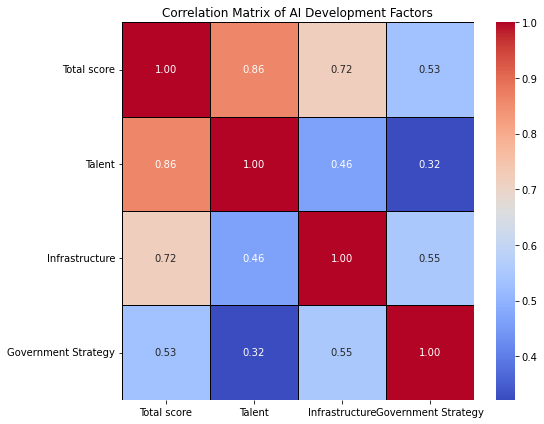

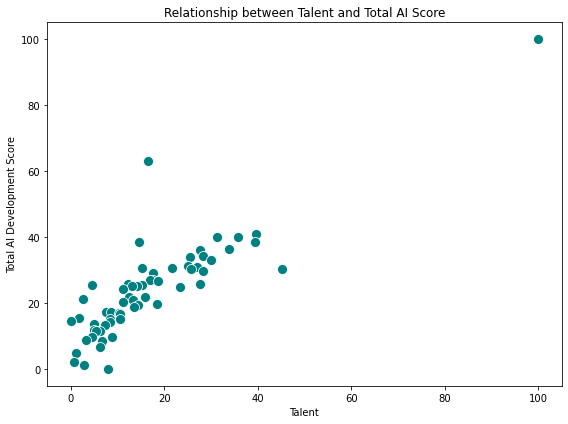

In [15]:
correlation_matrix = df_AI[['Total score', 'Talent', 'Infrastructure', 'Government Strategy']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix of AI Development Factors')
plt.tight_layout()
plt.show()

from sklearn.linear_model import LinearRegression

X = df_AI[['Talent', 'Infrastructure', 'Government Strategy']] 
y = df_AI['Total score']  

model = LinearRegression()
model.fit(X, y)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

most_influential_factor = coefficients.index[0]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_AI[most_influential_factor], y=df_AI['Total score'], color='teal', s=100)
plt.title(f'Relationship between {most_influential_factor} and Total AI Score')
plt.xlabel(most_influential_factor)
plt.ylabel('Total AI Development Score')
plt.tight_layout()
plt.show()


# 10.How do different income groups of countries perform in terms of AI development, and what trends can be observed between income level and AI development scores?

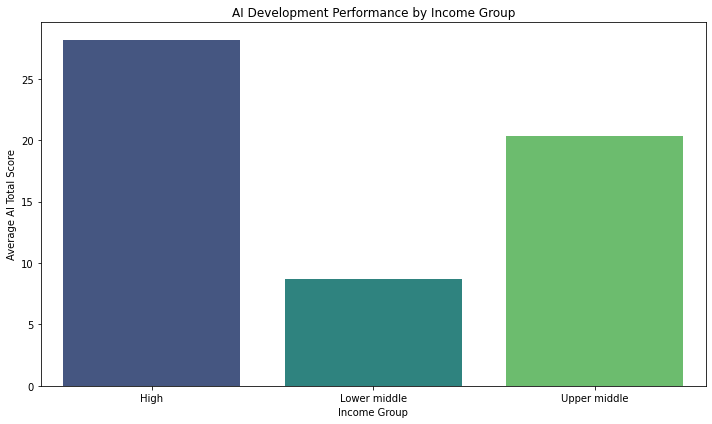

In [16]:
income_group_performance = df_AI.groupby('Income group')['Total score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Income group', y='Total score', data=income_group_performance, palette='viridis')
plt.title('AI Development Performance by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average AI Total Score')
plt.tight_layout()
plt.show()
